In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/anand/Desktop/Machine Learning/List_of_DataSet/SOCR-HeightWeight.csv")
print("shape of the dataset : " , df.shape)

shape of the dataset :  (25000, 3)


In [3]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
# remove the column name index from the dataset df
# Drop the column 'index' from the DataFrame
df = df.drop('Index', axis=1)

#### Overvieww of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


##### checking is there any null values

In [7]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

#### Getting the duplicated values 

In [10]:
df.duplicated().sum()

0

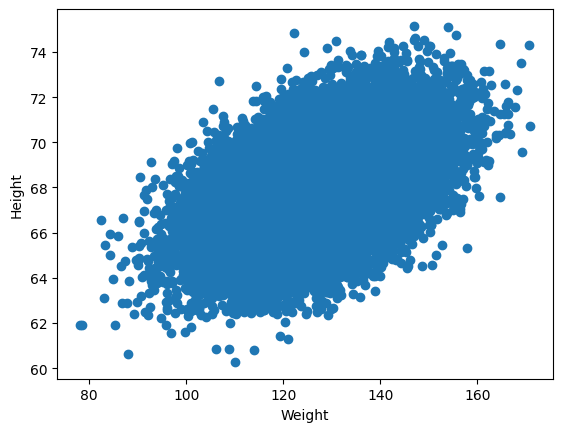

In [18]:
#plot the scatter plot for the height and the weight
plt.scatter(df['Weight(Pounds)'] , df['Height(Inches)'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [36]:
df['Height(CM)'] = df['Height(Inches)'] * 2.54

# Convert weight from pounds to kg
df['Weight(KG)'] = df['Weight(Pounds)'] * 0.453592

# Display the DataFrame with new columns
print(df)

       Height(Inches)  Weight(Pounds)  Height(CM)  Weight(KG)
0            65.78331        112.9925  167.089607   51.252494
1            71.51521        136.4873  181.648633   61.909547
2            69.39874        153.0269  176.272800   69.411778
3            68.21660        142.3354  173.270164   64.562199
4            67.78781        144.2971  172.181037   65.452010
...               ...             ...         ...         ...
24995        69.50215        118.0312  176.535461   53.538008
24996        64.54826        120.1932  163.952580   54.518674
24997        64.69855        118.2655  164.334317   53.644285
24998        67.52918        132.2682  171.524117   59.995797
24999        68.87761        124.8742  174.949129   56.641938

[25000 rows x 4 columns]


In [37]:
df.head()

,Height(Inches),Weight(Pounds),Height(CM),Weight(KG)
0,65.78331,112.9925,167.089607,51.252494
1,71.51521,136.4873,181.648633,61.909547
2,69.39874,153.0269,176.272800,69.411778
3,68.21660,142.3354,173.270164,64.562199
4,67.78781,144.2971,172.181037,65.452010


In [39]:
# Drop multiple columns 'Weight(Pounds)' and 'Height(Inches)'
df = df.drop(['Weight(Pounds)', 'Height(Inches)'], axis=1)


In [40]:
df.head()

,Height(CM),Weight(KG)
0,167.089607,51.252494
1,181.648633,61.909547
2,176.272800,69.411778
3,173.270164,64.562199
4,172.181037,65.452010


In [41]:
df.corr()

,Height(CM),Weight(KG)
Height(CM),1.000000,0.502859
Weight(KG),0.502859,1.000000


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


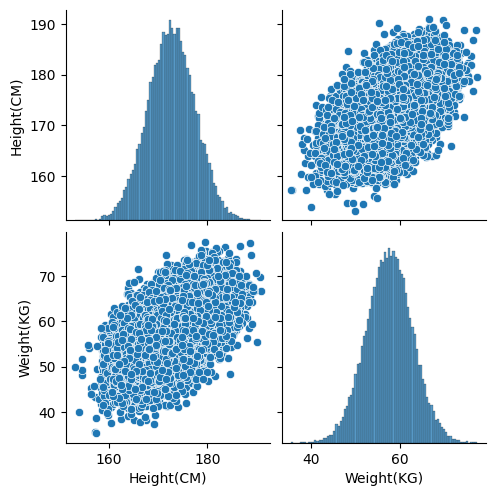

In [42]:
sns.pairplot(df)

### convert the feature into Independent and dependent feature

In [44]:
X = df[['Weight(KG)']]
y = df['Height(CM)']

In [45]:
# The independent feature needs to be 2 dimensional array or dataframe 
np.array(X).shape

(25000, 1)

In [46]:
# The dependent feature can be like the 1 d or series 
np.array(y).shape

(25000,)

In [47]:
## Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (20000, 1)
Shape of X_test :  (5000, 1)
Shape of y_train :  (20000,)
Shape of y_test :  (5000,)


In [51]:
## standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [52]:
X_test = scaler.transform(X_test)

In [53]:
X_test

array([[ 0.61959496],
       [-1.29909507],
       [ 0.76587649],
       ...,
       [ 1.212802  ],
       [ 0.21044337],
       [ 0.65975876]])

In [56]:
## Apply linear regression Model using Sklearn 
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [58]:
regression.fit(X_train , y_train)

LinearRegression()

In [63]:
print("Coefficient or slope is : ",regression.coef_)
print("The Intercept of the dataset is : " , regression.intercept_)

Coefficient or slope is :  [2.41356214]
The Intercept of the dataset is :  172.69547689309


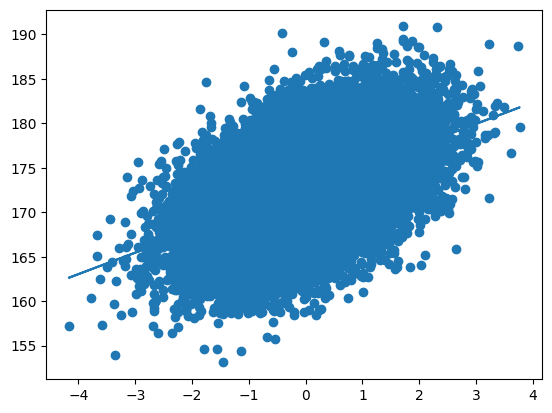

In [65]:
# plot the best fit line
plt.scatter(X_train , y_train)
plt.plot(X_train , regression.predict(X_train))

In [66]:
# precition for the test data 
y_pred = regression.predict(X_test)

In [67]:
# Performance Metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('R-squared:', metrics.r2_score(y_test, y_pred))  
# Residual Plot

Mean Absolute Error: 3.34341230460237
Mean Squared Error: 17.580370297673195
Root Mean Squared Error: 4.192895216634109
R-squared: 0.2605563163045014


In [68]:
# OLS model 
import statsmodels.api as sm

In [69]:
model = sm.OLS(y_train , X_train).fit()

In [71]:
prediction = model.predict(X_test)

In [72]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Height(CM)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.904
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                      0.0482
Time:                        16:15:19   Log-Likelihood:                     -1.3142e+05
No. Observations:               20000   AIC:                                  2.628e+05
Df Residuals:                   19999   BIC:                                  2.628e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------